In [1]:
pip install geopandas rasterio folium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 37.6 MB/s eta 0:00:00


In [5]:
from google.colab import files

# Fazer o upload do arquivo de imagem de satélite
uploaded = files.upload()



Saving 28560008.webp to 28560008.webp
Saving 28560293.webp to 28560293.webp
Saving 28560458.webp to 28560458.webp
Saving 28560463.webp to 28560463.webp
Saving Áreas Alagadas - Rio Branco:AC- Bairro 6 de Agosto : Aeroporto Velho.webp to Áreas Alagadas - Rio Branco:AC- Bairro 6 de Agosto : Aeroporto Velho.webp
Saving Áreas alagadas em Xapuri Acre.webp to Áreas alagadas em Xapuri Acre.webp


In [6]:
# Verificar os arquivos carregados
import os
os.listdir()


['.config',
 '28560463.webp',
 'Áreas Alagadas - Rio Branco:AC- Bairro 6 de Agosto : Aeroporto Velho.webp',
 'Áreas alagadas em Xapuri Acre.webp',
 '28560008.webp',
 '28560458.webp',
 '28560293.webp',
 'sample_data']

In [7]:
from PIL import Image
import os

# Caminhos das imagens .webp
image_paths = [
    '/content/28560008.webp',
    '/content/28560293.webp',
    '/content/Áreas Alagadas - Rio Branco:AC- Bairro 6 de Agosto : Aeroporto Velho.webp',
    '/content/Áreas alagadas em Xapuri Acre.webp',
]

# Diretório de saída para salvar as imagens convertidas
output_dir = '/content/converted_images/'
os.makedirs(output_dir, exist_ok=True)  # Criar o diretório de saída, se não existir

# Converter cada imagem .webp para .tif
for image_path in image_paths:
    try:
        # Carregar a imagem .webp
        img = Image.open(image_path)

        # Definir o caminho para salvar a imagem convertida
        filename = os.path.basename(image_path).replace('.webp', '.tif')
        output_path = os.path.join(output_dir, filename)

        # Salvar a imagem como .tif
        img.save(output_path, format='TIFF')
        print(f'Imagem convertida e salva em: {output_path}')

    except Exception as e:
        print(f'Erro ao processar a imagem {image_path}: {e}')


Imagem convertida e salva em: /content/converted_images/28560008.tif
Imagem convertida e salva em: /content/converted_images/28560293.tif
Imagem convertida e salva em: /content/converted_images/Áreas Alagadas - Rio Branco:AC- Bairro 6 de Agosto : Aeroporto Velho.tif
Imagem convertida e salva em: /content/converted_images/Áreas alagadas em Xapuri Acre.tif


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


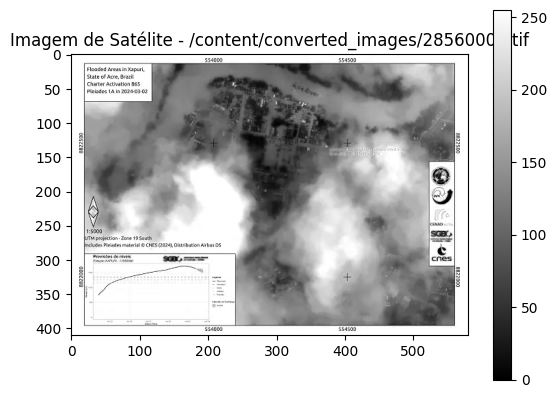

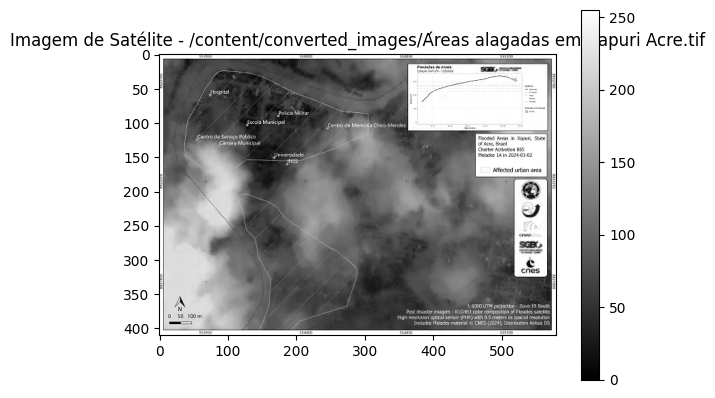

In [8]:
import rasterio
import matplotlib.pyplot as plt

# Caminhos de múltiplos arquivos de imagem
satellite_image_paths = [
          '/content/converted_images/28560008.tif',
          '/content/converted_images/Áreas alagadas em Xapuri Acre.tif',
]

# Loop para abrir e exibir cada arquivo de imagem
for satellite_image_path in satellite_image_paths:
    try:
        with rasterio.open(satellite_image_path) as src:
            satellite_data = src.read(1)  # Lê o primeiro band da imagem

        # Exibir a imagem sem alteração de paleta, usando o valor real dos pixels
        plt.imshow(satellite_data, cmap='gray')  # Usar 'gray' para visualizar a imagem real em tons de cinza
        plt.colorbar()
        plt.title(f'Imagem de Satélite - {satellite_image_path}')
        plt.show()

    except Exception as e:
        print(f"Erro ao abrir a imagem {satellite_image_path}: {e}")

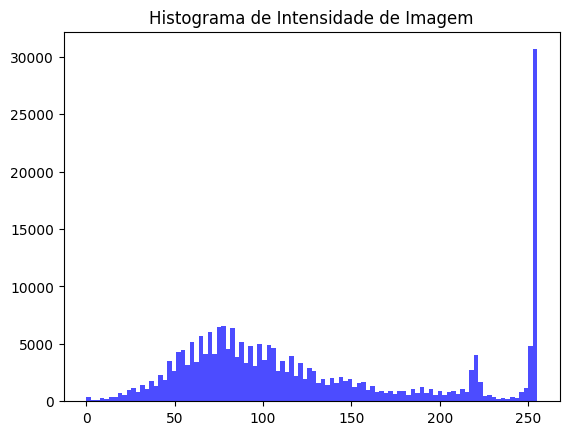

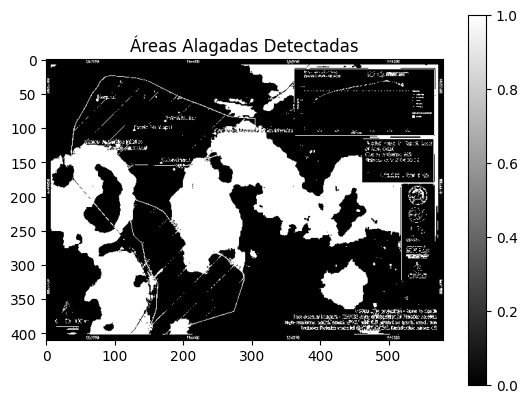

In [9]:
# Exibir o histograma da imagem para entender melhor os valores
plt.hist(satellite_data.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de Intensidade de Imagem')
plt.show()

# Definir o intervalo de valores para áreas alagadas
lower_threshold = 100  # Limite inferior
upper_threshold = 200  # Limite superior

# Detectar áreas alagadas com valores dentro do intervalo
water_areas = (satellite_data >= lower_threshold) & (satellite_data <= upper_threshold)

# Plotar as áreas alagadas
plt.imshow(water_areas, cmap='gray')
plt.colorbar()
plt.title('Áreas Alagadas Detectadas')
plt.show()




# Sobrepondo Imagens de Satélite a Mapas Geoespaciais com GeoPandas e Folium

In [10]:
!pip install geopandas folium rasterio


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)



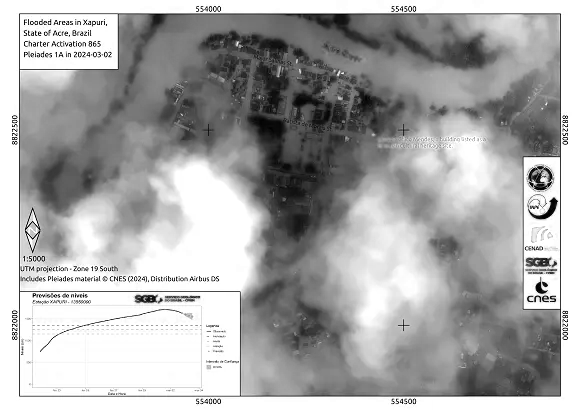

In [11]:
import folium
import numpy as np
import rasterio

# Caminho da imagem de satélite
satellite_image_path = '/content/converted_images/28560008.tif'

# Abrir a imagem com Rasterio
with rasterio.open(satellite_image_path) as src:
    satellite_data = src.read(1)  # Lê o primeiro band
    transform = src.transform  # Transformação geoespacial da imagem

# Obter os limites da imagem (usando o min e max corretamente)
min_value = np.min(satellite_data)
max_value = np.max(satellite_data)

# Criar o mapa base com Folium
m = folium.Map(location=[-8.77, -70.0], zoom_start=6)  # Coordenadas aproximadas da região Yanomami

# Adicionar a camada de imagem ao mapa
image_overlay = folium.raster_layers.ImageOverlay(
    image=satellite_data,  # Imagem de satélite processada
    bounds=[[transform[5] + transform[4] * satellite_data.shape[0], transform[5]],  # Definindo o limite inferior esquerdo
            [transform[5] + transform[4] * 0, transform[5] + transform[4] * satellite_data.shape[1]]],  # Definindo o limite superior direito
    opacity=0.7,  # Transparência
    name='Áreas Alagadas'
).add_to(m)

# Exibir o mapa
m.save('/content/satellite_map.html')
m


## Carregando registros de inundação entre 2003 e 2015 (metadados)

In [3]:
!pip install geopandas


In [5]:
import geopandas as gpd

# Caminho do Shapefile
shapefile_path = '/content/tis_poligonaisPolygon.shp'

# Carregar o Shapefile com GeoPandas
gdf = gpd.read_file(shapefile_path)

# Exibir as primeiras linhas do Shapefile
print(gdf.head())


    gid  terrai_cod        terrai_nom                             etnia_nome  \
0   1.0         101   Acapuri de Cima                                 Kokama   
1   2.0         201             Acimã                                Apurinã   
2   3.0         401  Água Preta/Inari                                Apurinã   
3  10.0        1101    Alto Rio Negro  Arapáso,Karapanã,Barasána,Baré,Wanana   
4  12.0        1301     Alto Sepatini                                Apurinã   

                        municipio_ uf_sigla    superficie       fase_ti  \
0                        Fonte Boa       AM  1.839394e+04  Regularizada   
1                           Lábrea       AM  4.068603e+04  Regularizada   
2                           Pauini       AM  1.397637e+05  Regularizada   
3  Japurá,São Gabriel da Cachoeira       AM  7.999381e+06  Regularizada   
4                           Lábrea       AM  2.609570e+04  Regularizada   

                 modalidade reestudo_t                              

## Visualização dos dados geoespaciais

In [11]:
import folium

# Criar um mapa base
m = folium.Map(location=[-8.77, -70.0], zoom_start=6)  # Coordenadas da área de interesse

# Adicionar a camada geoespacial ao mapa
folium.GeoJson(gdf).add_to(m)

# Salvar o mapa interativo
m.save('/content/mapa_interativo.html')
m


Output hidden; open in https://colab.research.google.com to view.

# Cruzamento de dados de enchentes malária

In [2]:
import pandas as pd

# Caminhos dos arquivos CSV
malaria_data_paths = [
    '/content/Dados_de_Mal_ria_na_Amaz_nia_e_Roraima.csv'
]

# Carregar e mostrar os dados de cada arquivo separadamente
for file_path in malaria_data_paths:
    # Carregar o arquivo CSV
    malaria_df = pd.read_csv(file_path)

    # Exibir os primeiros 5 registros de cada DataFrame
    print(f"Primeiras linhas de {file_path}:")
    print(malaria_df.head())  # Mostrar os primeiros 5 registros
    print("\n" + "-"*50 + "\n")



Primeiras linhas de /content/Dados_de_Mal_ria_na_Amaz_nia_e_Roraima.csv:
                  municipio estado   ano  casos  obitos
0                    Manaus     AM  2020   1200       5
1                      Tefé     AM  2020    850       3
2               Itacoatiara     AM  2020    670       2
3  São Gabriel da Cachoeira     AM  2020    540       1
4                 Boa Vista     RR  2020    300       1

--------------------------------------------------



## Integração de dados fcticios de malária com as imagens de satélite

In [16]:
import pandas as pd
import geopandas as gpd

malaria_df = pd.read_csv('/content/Dados_de_Mal_ria_na_Amaz_nia_e_Roraima.csv')

# Padronizar nomes dos municípios
malaria_df['municipio'] = malaria_df['municipio'].str.lower().str.strip()


gdf = gpd.read_file('/content/tis_poligonaisPolygon.shp')

# Exibir colunas disponíveis
print(gdf.columns)


Index(['gid', 'terrai_cod', 'terrai_nom', 'etnia_nome', 'municipio_',
       'uf_sigla', 'superficie', 'fase_ti', 'modalidade', 'reestudo_t', 'cr',
       'faixa_fron', 'undadm_cod', 'undadm_nom', 'undadm_sig', 'dominio_un',
       'data_atual', 'epsg', 'geometry'],
      dtype='object')


In [17]:
# Igualando os nomes da colunas
gdf['municipio'] = gdf['municipio_'].str.lower().str.strip()

## Cruzando os dados

In [18]:
# Juntar os dados por município
combined_df = pd.merge(malaria_df, gdf, on='municipio', how='left')

# Verificar as primeiras linhas
print(combined_df[['municipio', 'casos', 'obitos'] + [col for col in gdf.columns if col != 'geometry']].head())


                  municipio  casos  obitos    gid  terrai_cod  \
0                    manaus   1200       5    NaN         NaN   
1                      tefé    850       3   58.0      5901.0   
2               itacoatiara    670       2  322.0     33001.0   
3               itacoatiara    670       2  398.0     40501.0   
4  são gabriel da cachoeira    540       1   51.0      5301.0   

           terrai_nom             etnia_nome                municipio_  \
0                 NaN                    NaN                       NaN   
1  Barreira da Missão         Kambéba,Kokama                      Tefé   
2   Paraná do Arauató                   Múra               Itacoatiara   
3           Rio Urubu                   Múra               Itacoatiara   
4              Balaio  Tukano,Tariana,Desána  São Gabriel da Cachoeira   

  uf_sigla   superficie  ... reestudo_t  \
0      NaN          NaN  ...        NaN   
1       AM    1772.4237  ...       None   
2       AM    5915.4450  ...       

# Construção do Modelo Preditivo
## Regras Lógicas (Modelo Heurístico Base)
Vamos criar um modelo de decisão simples baseado em regras . Ele funcionará como um primeiro alerta ou filtro antes do uso de aprendizado de máquina.

In [21]:
# Criar uma base em uma lista de municipios
municipios_inundados = ['manaus', 'boa vista', 'tabatinga', 'uarini']  # exemplo

combined_df['risco_inundacao'] = combined_df['municipio'].apply(lambda x: 1 if x in municipios_inundados else 0)


In [23]:
def classificar_risco(row):
    if row['casos'] > 300 and row['risco_inundacao'] == 1:
        return 'Alto'
    elif row['casos'] > 60 and row['risco_inundacao'] == 1:
        return 'Médio'
    else:
        return 'Baixo'

# Aplicar ao dataframe combinado
combined_df['risco_predito_heuristica'] = combined_df.apply(classificar_risco, axis=1)

# Visualizar os resultados
combined_df[['municipio', 'casos', 'risco_inundacao', 'risco_predito_heuristica']].head()


,municipio,casos,risco_inundacao,risco_predito_heuristica
0,manaus,1200,1,Alto
1,tefé,850,0,Baixo
2,itacoatiara,670,0,Baixo
3,itacoatiara,670,0,Baixo
4,são gabriel da cachoeira,540,0,Baixo


# Modelo de Aprendizado de Máquina


In [25]:
from sklearn.model_selection import train_test_split

# Features possíveis
features = ['casos', 'obitos', 'risco_inundacao']
X = combined_df[features]
y = (combined_df['casos'] > 300).astype(int)  # Ex: alvo binário: 1 = surto alto, 0 = surto baixo

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Regressão Logística

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Treinar
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Avaliar
y_pred_log = log_model.predict(X_test)
print("Relatório - Regressão Logística:")
print(classification_report(y_test, y_pred_log))


Relatório - Regressão Logística:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.80      0.89         5

    accuracy                           0.80         5
   macro avg       0.50      0.40      0.44         5
weighted avg       1.00      0.80      0.89         5



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Random Forest

Relatório - Random Forest:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.80      0.89         5

    accuracy                           0.80         5
   macro avg       0.50      0.40      0.44         5
weighted avg       1.00      0.80      0.89         5



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: title={'center': 'Importância das Features'}>

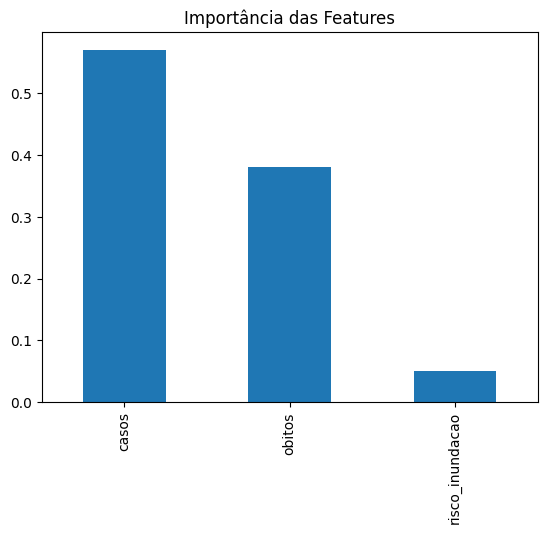

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Avaliar
y_pred_rf = rf_model.predict(X_test)
print("Relatório - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Importância das variáveis
importances = pd.Series(rf_model.feature_importances_, index=features)
importances.plot(kind='bar', title='Importância das Features')


## Pipeline para Atualização Contínua

In [28]:
import joblib

# Salvar
joblib.dump(rf_model, 'modelo_malaria_rf.pkl')

# Recarregar no futuro
modelo_carregado = joblib.load('modelo_malaria_rf.pkl')


In [2]:
!pip install SQLAlchemy


In [3]:
from sqlalchemy import create_engine, Column, Integer, String, Float, Date, MetaData, Table
